<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex04_%EA%B0%9C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# /content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small/validation'

In [2]:
# 하나의 변수에 이미지 파일 전부다 합치기
# 픽셀값 변경 (0~255 / 정수) > (0~1 / 실수) : 정규화
## 1. 숫자 크기 줄이기 > 연산량 감소
## 2. 분산 줄이기 > 연산의 오류 줄어듦
# 이미지 크기 맞춰주기 (150, 150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 픽셀값 변경하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기 (묵시적 형변환 int => float)
generator = ImageDataGenerator(rescale= 1./255)



In [4]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주지
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [5]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주지
# 라벨링
valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 1000 images belonging to 2 classes.


In [6]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

In [8]:
model1.add(Flatten())
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [9]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [10]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 454s 22s/step - loss: 0.7607 - accuracy: 0.5320 - val_loss: 0.6904 - val_accuracy: 0.5170
Epoch 2/20
20/20 [==============================] - 8s 411ms/step - loss: 0.6744 - accuracy: 0.5795 - val_loss: 0.6622 - val_accuracy: 0.5950
Epoch 3/20
20/20 [==============================] - 9s 435ms/step - loss: 0.6133 - accuracy: 0.6705 - val_loss: 0.6234 - val_accuracy: 0.6510
Epoch 4/20
20/20 [==============================] - 9s 436ms/step - loss: 0.5191 - accuracy: 0.7585 - val_loss: 0.6351 - val_accuracy: 0.6400
Epoch 5/20
20/20 [==============================] - 8s 409ms/step - loss: 0.4324 - accuracy: 0.8015 - val_loss: 0.6878 - val_accuracy: 0.6480
Epoch 6/20
20/20 [==============================] - 10s 515ms/step - loss: 0.3573 - accuracy: 0.8460 - val_loss: 0.6726 - val_accuracy: 0.6780
Epoch 7/20
20/20 [==============================] - 8s 424ms/step - loss: 0.2793 - accuracy: 0.8930 - val_loss: 0.6876 - val_accuracy: 0.6990
Epoch

In [11]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/스크린샷 2023-09-27 150622.png',cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

In [12]:
# 0 = cat, 1 = dog
model1.predict(pre_img)

# 결과 : 0 = 6, 1 = 17
# 대다수의 사람이 개라는 결과를 얻는다 = 모델 학습이 덜되서
# 개의 규칙은 잘 찾았지만 고양이의 규칙은 잘 찾지 못했기 때문

1/1 [==============================] - 0s 313ms/step


array([[1.]], dtype=float32)

In [13]:
# train accuracy : 0.98
# val accuracy : 0.7
# > train은 학습이 잘 됐고, val은 학습이 안됐다 => 과대적합에 걸렸다.
# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다.(추가적으로 데이터를 수집) > 많이 어렵다
# 2. 모델을 더 깊게 구성한다 (층을 더 많이 쌓는다)
# 3. 데이터를 확장한다.(가지고 있는 데이터를 다양하게 표현)


In [14]:
# 데이터를 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 => 확장 안된 이미지로 학습 => 결과 확인 => 만족스럽지 않다 => 데이터 확장 후 학습

In [15]:
# 기존 모델에 확장 데이터로 학습하기
aug_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [16]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [17]:
model1.fit(
    train_aug_generator,
    epochs=20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 23s 1s/step - loss: 0.8332 - accuracy: 0.6155 - val_loss: 0.6691 - val_accuracy: 0.5790
Epoch 2/20
20/20 [==============================] - 24s 1s/step - loss: 0.6566 - accuracy: 0.5965 - val_loss: 0.6305 - val_accuracy: 0.6410
Epoch 3/20
20/20 [==============================] - 20s 1s/step - loss: 0.6398 - accuracy: 0.6315 - val_loss: 0.6286 - val_accuracy: 0.6600
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.6215 - accuracy: 0.6460 - val_loss: 0.6112 - val_accuracy: 0.6660
Epoch 5/20
20/20 [==============================] - 20s 1s/step - loss: 0.5896 - accuracy: 0.6895 - val_loss: 0.6815 - val_accuracy: 0.6480
Epoch 6/20
20/20 [==============================] - 21s 1s/step - loss: 0.5936 - accuracy: 0.6880 - val_loss: 0.6053 - val_accuracy: 0.6790


KeyboardInterrupt: ignored

# 언어지능 시작

# 과대적합을 줄이는  방법들
- 증식
  - 장점 : 간단
  - 단점 : 가짜는 가짜다. (급격한 성능 향상은 없다)
  - epoch 수는 증가시켜주어야한다.
- dropout()
  - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
  - epoch마다 사용하지 않는 퍼셉트론은 랜덤
- BatchNormalization() : 정규화
  - CNN층 = Conv (특성추출) + Maxpooling (크기 축소)
  - Conv층의 파라미터를 정규화(평균 0, 분산 1) <br>
  => 음수가 발생 <br>
  => relu를 적용하면 <br>
  => 음수가 사라지는 문제 => leaky relu
- GlobalAveragePooling2D()
  - CNN에서 가장 문제가 되는 층 : Maxpooling 층 <br>
  => CNN 속도의 60% 이상을 차지 (느리다)
  - Maxpooling2D+ Flatten()
  - Dense 층과 연결되는 층에 사용
  

- Data Generator : 학습 시킬 때 한 번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는것 (메모리 자원 부족을 해결)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)
valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

In [ ]:
# 라벨은 알파벳 순
train_generator.class_indices, valid_generator.class_indices

# 신경망 설계  

In [ ]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

In [ ]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

In [ ]:
model1.add(Flatten())

model1.add(Dropout(0.5))

model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

- GlobalAveragePooling2D()

In [ ]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

# model1.add(MaxPool2D(
#     pool_size= (2,2)
# ))

# model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))

model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

In [ ]:
model1.fit(
    train_generator,
    epochs = 50,
    validation_data = valid_generator
)

- BatchNormalization()
  - Conv2D()와 Activation() 층 사이에 배치
  - Activation()이 정규화 기능을 일부 수행 => Activation() 다음에 배치하면 효과가 떨어짐
  - 원칙 : C + B + A + M => 근데 일반적으로 : C + A + B + M

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from keras.layers import Activation, LeakyReLU



model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())

model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 128, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 32, activation = LeakyReLU(alpha=0.1)))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

In [ ]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

# 전이학습

- 미리 학습된 모델이나 가중치를 가져다 쓰는 방법


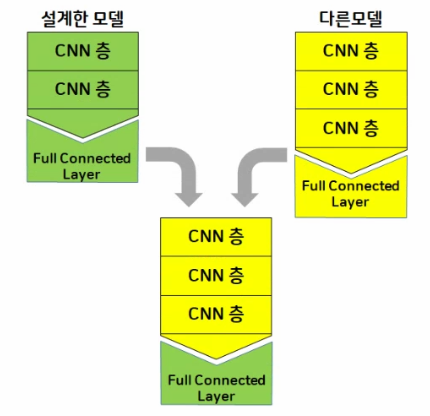

- 전이학습 하는 이유
  - 데이터가 부족
  - 설계한 신경망이 그닥 좋지 못하다

- 전이학습의 종류
  - 특성 추출 : CNN층의 가중치를 그대로 사용
  - 미세 조정 (fine tuning) : CNN층의 가중치를 일부 살짝 변경해서 사용

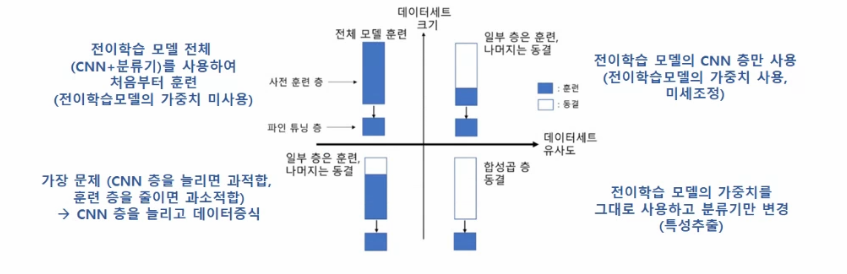

- VGG16 다운로드

In [48]:
from tensorflow.keras.applications import VGG16

# weights : 사용할 가중치의 종류 (imagenet)
# include_top = False : 모델을 전체 또는 특성추출기만 가져올 것인지 선택 (False : 특성추출기만 가져옴)
# input_shpae :
conv_base = VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (150, 150, 3)
)

In [49]:
# VGG16 모델을 확인
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

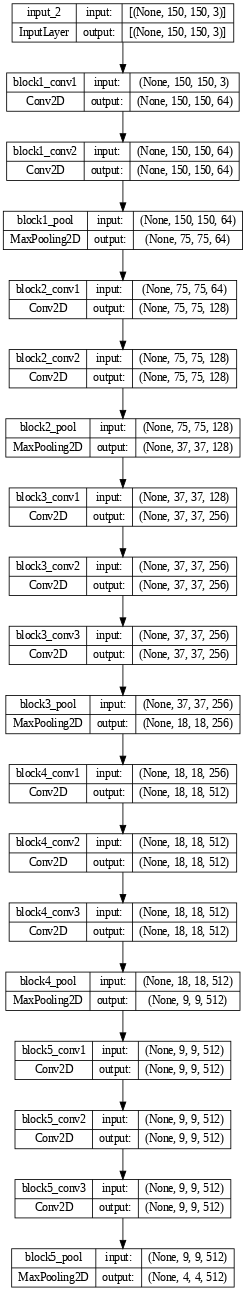

In [21]:
from tensorflow.keras.utils import plot_model


plot_model(conv_base, show_shapes= True, dpi=60)

#### 신경망 구조를 이미지로 시각화

In [22]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 5.3 MB/s eta 0:00:00


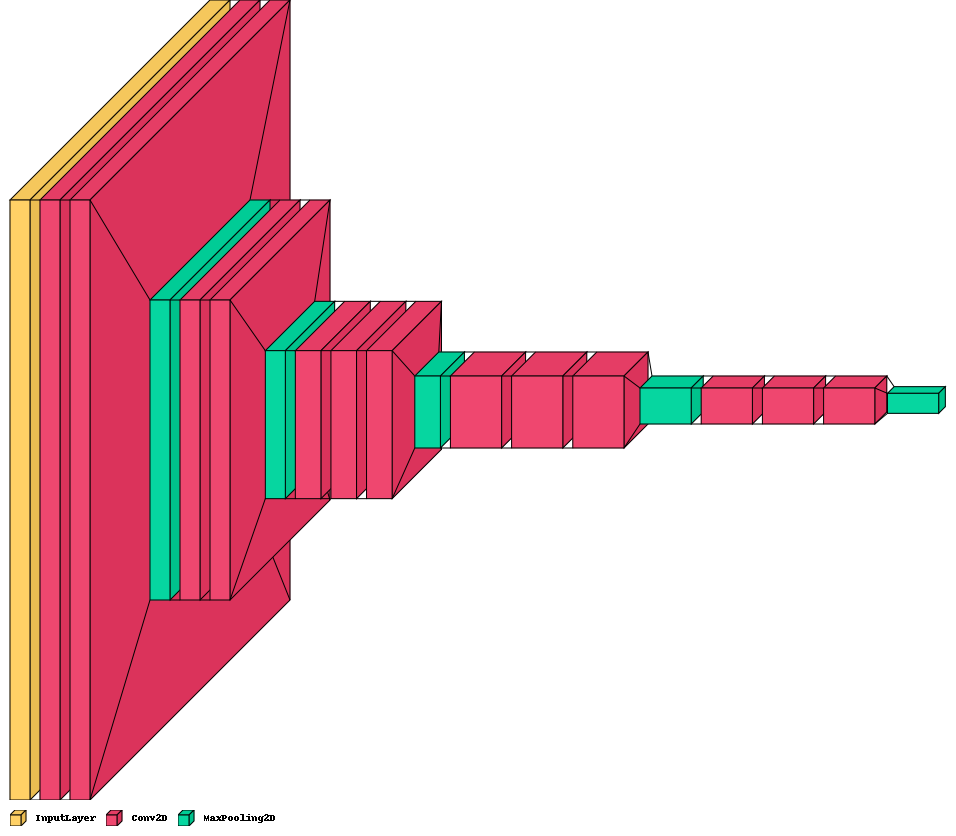

In [23]:
import visualkeras

# 신경망의 층을 시각화
visualkeras.layered_view(conv_base).show()
# 층 이름의 범례 표시
visualkeras.layered_view(conv_base, legend=True)

#### 학습이 가능한 파라미터의 종류 수 확인

In [50]:
print(f'학습 가능한 파라미터의 종류의 수 : {len(conv_base.trainable_weights)}')

학습 가능한 파라미터의 종류의 수 : 26


### 우리 모델에 VGG16을 연결

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from keras.layers import Activation, LeakyReLU

model1 = Sequential()

model1.add(conv_base)
model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 128, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 32, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                524352    
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)               

- 동결 : 가져온 모델은 학습이 되지 않도록 설정

In [52]:
print(f'학습 가능한 파라미터의 종류의 수 : {len(model1.trainable_weights)}')

학습 가능한 파라미터의 종류의 수 : 36


In [29]:
# VGG16 모델은 훈련이 되지 않도록 설정
conv_base.trainable = False

In [30]:
print(f'학습 가능한 파라미터의 종류의 수 : {len(model1.trainable_weights)}')

학습 가능한 파라미터의 종류의 수 : 10


In [31]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [33]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 10s 507ms/step - loss: 0.1194 - accuracy: 0.9555 - val_loss: 0.2744 - val_accuracy: 0.9100
Epoch 2/20
20/20 [==============================] - 12s 617ms/step - loss: 0.0954 - accuracy: 0.9605 - val_loss: 0.3896 - val_accuracy: 0.8770
Epoch 3/20
20/20 [==============================] - 9s 464ms/step - loss: 0.1153 - accuracy: 0.9505 - val_loss: 0.3432 - val_accuracy: 0.8790
Epoch 4/20
20/20 [==============================] - 10s 482ms/step - loss: 0.0840 - accuracy: 0.9675 - val_loss: 0.2903 - val_accuracy: 0.9020
Epoch 5/20
20/20 [==============================] - 10s 502ms/step - loss: 0.0620 - accuracy: 0.9770 - val_loss: 0.3776 - val_accuracy: 0.9010
Epoch 6/20
20/20 [==============================] - 9s 468ms/step - loss: 0.0682 - accuracy: 0.9760 - val_loss: 0.4026 - val_accuracy: 0.8840
Epoch 7/20
20/20 [==============================] - 10s 482ms/step - loss: 0.0872 - accuracy: 0.9630 - val_loss: 0.3137 - val_accuracy: 0.8970
E

### 미세조정(fine tuning) : 분류기가 연결되는 모델의 층만 학습이 되도록 동결을 풀어주는 것

In [53]:
# 마지막층 (5번째 층) 만 학습이 되도록 동경을 품
# 모델의 훈련이 가능하도록 설정

conv_base.trainable = True

set_trainable = False
# 각 층을 돌면서 block5_conv1을 만나면 동결 해제
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True

  if set_trainable :
    layer.trainable = True
  else:
    layer.trainable = False


In [54]:
print(f'학습 가능한 파라미터의 종류의 수 : {len(model1.trainable_weights)}')

학습 가능한 파라미터의 종류의 수 : 16


In [55]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [56]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 13s 472ms/step - loss: 1.0246 - accuracy: 0.5365 - val_loss: 0.6988 - val_accuracy: 0.4990
Epoch 2/20
20/20 [==============================] - 10s 479ms/step - loss: 0.6915 - accuracy: 0.5265 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 3/20
20/20 [==============================] - 11s 556ms/step - loss: 0.6949 - accuracy: 0.4910 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 9s 455ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 9s 455ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 10s 482ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 9s 472ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Ep

### Xception 모델을 전이학습

In [58]:
from tensorflow.keras.applications import Xception

conv_base2 = Xception(
    weights ="imagenet",
    include_top =False,
    input_shape = (150, 150,3)
)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
conv_base2.summary()

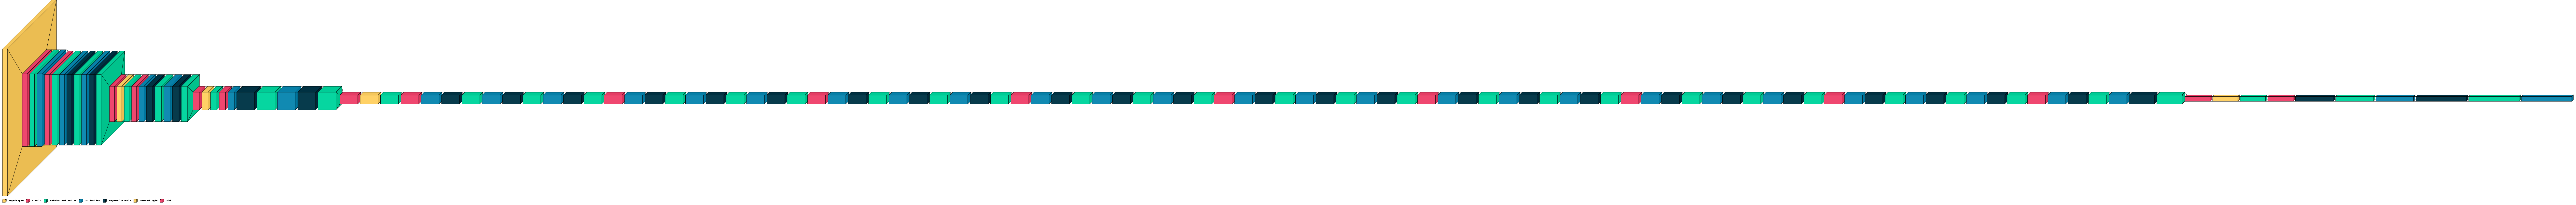

In [60]:
visualkeras.layered_view(conv_base2).show()
visualkeras.layered_view(conv_base2, legend=True)

In [62]:
print(f'학습 가능한 파라미터의 종류의 수 : {len(conv_base2.trainable_weights)}')

학습 가능한 파라미터의 종류의 수 : 154


In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from keras.layers import Activation, LeakyReLU

model1 = Sequential()

model1.add(conv_base2)
model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 128, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 32, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

# VGG16 모델은 훈련이 되지 않도록 설정
conv_base2.trainable = False

model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model1.fit(
    train_generator,
    epochs = 10,
    validation_data = valid_generator
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_7 (Dropout)         (None, 51200)             0         
                                                                 
 dense_37 (Dense)            (None, 64)                3276864   
                                                                 
 dense_38 (Dense)            (None, 128)               8320      
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 32)               